# Introduction

### The aim of this project is to analyse the covid19 sentiment based on live streamed tweets and determine people's current feelings about the event happening presently. 

## Workflow:
+ Establish a connection with the Twitter API
+ Extract relevant tweets in JSON format
+ Store information from Tweers into postgresql database
+

# Install relevant libraries

In [5]:
# !pip install tweepy
# !pip install psycopg2

# Authenticating the API

In [56]:
# Twitter API authentication

import tweepy

api_key =  "zlX5kaiELnRjkvpD50dMKOACc"
api_secret_key = "dsBe2SBl5FZBcpEBkBeoQMlbPqbrTz98uFUL0j0vXOsTq3ryPr"
access_token =  "1382554110331736068-ByGbTY7C4f0ssIOyNIaSuT9bNCotvz"
access_token_secret =  "qndNBd4p9jHr3HZLJskyahPuU5HmzKwQCQ1Y5NgVwKfdr"

# authorize the API Key
authentication = tweepy.OAuthHandler(api_key, api_secret_key)

# authorization to user's access token and access token secret
authentication.set_access_token(access_token, access_token_secret)

# call the api
api = tweepy.API(authentication)

# Streaming Tweets Using Tweepy

In [2]:
# Streaming tweets from home timeline

public_tweet = api.home_timeline(count=5)

for tweet in public_tweet:
    print("-->",tweet.text)

--> Matchday 29 is almost here! Make sure you check out the Top 5 @Bundesliga_EN Most Unexpected Goals powered by #AWS… https://t.co/o3B6AHXDti
--> RT @meisshaily: Visited @Queensland #Australia #AI hub: @QLD_AI_Hub  The Silicon Valley of Queensland. 

Love the place.... #ArtificialInte…
--> Now you can get up to 10x better query performance than other enterprise cloud data warehouses with AQUA (Advanced… https://t.co/rTbW3LEnsg
--> Today we celebrate Supriya Solbach, a Partner Sales Manager with our Strategic Accounts team. To learn more about t… https://t.co/eRKBuLYCRW
--> 🚨 We are excited to announce 6️⃣ new @F1 insights for #GrandPrix fans, giving you a front row seat to the action on… https://t.co/jKRWrPR4eN


In [3]:
# Streaming tweets from user timeline

user = "AnalyticsVidhya"
public_tweet = api.user_timeline(id=user,count=5)

for tweet in public_tweet:
    print("-->",tweet.text)

--> 📢 Free #Course on #EnsembleLearning!

Ensemble learning is a powerful #MachineLearning technique every… https://t.co/yumBqErV25
--> What's your favorite #DataVisualization library?
Here's a quick introduction to the most popular #visualization lib… https://t.co/sMpols2ZKJ
--> #DeepLearning Guide: Introduction to Implementing #NeuralNetworks using #TensorFlow in #Python.… https://t.co/g2NzJ2TTMD
--> #Datascience hackathons can be a tough nut to crack, especially for beginners. Lakshay Arora has listed 12 powerful… https://t.co/jQinbOEd0h
--> #BigData is becoming bigger by the day, and at an unprecedented pace. Learn to store, process and use huge amount o… https://t.co/mJffnTZ2ib


# Streaming Tweets on Keywords

In [4]:
# Retrieve tweets
result = api.search(['covid','Covid-19','COVID-19'], lang='en', count=10)

# JSON keys
from pprint import pprint
pprint(result[0]._json.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])


# To access the Tweet JSON

In [5]:
pprint(result[0].user._json)

{'contributors_enabled': False,
 'created_at': 'Tue Sep 08 19:45:11 +0000 2020',
 'default_profile': True,
 'default_profile_image': True,
 'description': '',
 'entities': {'description': {'urls': []}},
 'favourites_count': 0,
 'follow_request_sent': False,
 'followers_count': 1,
 'following': False,
 'friends_count': 2,
 'geo_enabled': False,
 'has_extended_profile': True,
 'id': 1303418975896834053,
 'id_str': '1303418975896834053',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 0,
 'location': '',
 'name': 'Ankit',
 'notifications': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png',
 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png',
 'profile_link_color': '1DA1F2',
 'p

# To access hashtags from the following code, use this:

In [13]:
pprint(result[4].entities['hashtags'])

[]


# Stream Tweets in realtime

In [42]:
class MyStreamListener(tweepy.StreamListener):
    
    def __init__(self, time_limit=300):
        self.start_time = time.time()
        self.limit = time_limit
        super(MyStreamListener, self).__init__()
    
    def on_connect(self):
        print("Connected to Twitter API.")
        
    def on_status(self, status):
        
        
        # Tweet ID
        tweet_id = status.id
        
        # User ID
        user_id = status.user.id
        # Username
        username = status.user.name
        
        
        # Tweet
        if status.truncated == True:
            tweet = status.extended_tweet['full_text']
            hashtags = status.extended_tweet['entities']['hashtags']
        else:
            tweet = status.text
            hashtags = status.entities['hashtags']
        
        # Read hastags
        hashtags = read_hashtags(hashtags)            
        
        # Retweet count
        retweet_count = status.retweet_count
        # Language
        lang = status.lang
        
        
        # If tweet is not a retweet and tweet is in English
        if not hasattr(status, "retweeted_status") and lang=="en":
            # Connect to database
            dbConnect(user_id, username, tweet_id, tweet, retweet_count, hashtags)
            
        if (time.time() - self.start_time) > self.limit:
            
            print(time.time(), self.start_time, self.limit)
            return False
            
    def on_error(self, status_code):
        if status_code == 420:
            # Returning False in on_data disconnects the stream
            return False

# Extract hashtags

In [31]:
# Extract hashtags
def read_hashtags(tag_list):
    hashtags = []
    for tag in tag_list:
        hashtags.append(tag['text'])
    return hashtags

# Create tables in PostgreSQL

## Table1: TwitterUser - contains user-specific information. 
+ user_id – Unique user id. This will be the PRIMARY KEY for the table.
+ user_name – User screen name

## Table 2: TwitterTweet
+ tweet_id – Unique tweet id. This will be the PRIMARY KEY for the table.
+ tweet – Tweet text
+ retweet_count – Number of times the tweet was retweeted
+ user_id – To relate the user information with their tweet information, we are going to include the user_id from the TwitterUser table as a FOREIGN KEY in this table.

## Table 3:TwitterEntity - specifically storing hashtags from tweets.
+ id – Unique to represent the rows. It will be of SERIAL type which will make sure that this field increments automatically as new rows are added to the table. We don’t have to provide this value, the database will handle it on its own (perks of using Postgresql ;))
+ hashtag – It will store the hashtags and will be of VARCHAR type.
+ tweet_id – To relate the table to the TwitterTweet table, we will include the tweet_id as FOREIGN KEY in the table.


In [11]:
# Table creation
commands = (# Table 1
            '''Create Table TwitterUser(User_Id BIGINT PRIMARY KEY, User_Name TEXT);''',
            # Table 2
            '''Create Table TwitterTweet(Tweet_Id BIGINT PRIMARY KEY,
                                         User_Id BIGINT,
                                         Tweet TEXT,
                                         Retweet_Count INT,
                                         CONSTRAINT fk_user
                                             FOREIGN KEY(User_Id)
                                                 REFERENCES TwitterUser(User_Id));''',
            # Table 3
            '''Create Table TwitterEntity(Id SERIAL PRIMARY KEY,
                                         Tweet_Id BIGINT,
                                         Hashtag TEXT,
                                         CONSTRAINT fk_user
                                             FOREIGN KEY(Tweet_Id)
                                                 REFERENCES TwitterTweet(Tweet_Id));''')

# Connect to Postgresql (database server) using psycopg

In [43]:
import psycopg2

# Connection to database server
conn = psycopg2.connect(host="localhost",database="TwitterDB",port=5433,user="postgres",password="postgres")

In [44]:
# Create cursor to execute SQL commands
cur = conn.cursor()

# Execute SQL commands
for command in commands:
    # Create tables
    cur.execute(command)

# Close communication with server
conn.commit()
cur.close()
conn.close()

DuplicateTable: relation "twitteruser" already exists


In [ ]:
#Don’t forget to commit the changes and close connection after use so that the database doesn’t get locked!

# Connecting to the database
+ Whenever a tweet needs to be saved to the database, we will first open a connection to the database, execute the SQL command to the database, commit the changes, and finally close the connection. This is what is happening in the dbConnect() method below.

In [45]:
# Insert Tweet data into database
def dbConnect(user_id, user_name, tweet_id, tweet, retweet_count, hashtags):
    
    conn = psycopg2.connect(host="localhost",database="TwitterDB",port=5433,user="postgres",password="postgres")
    
    cur = conn.cursor()

    # insert user information
    command = '''INSERT INTO TwitterUser (user_id, user_name) VALUES (%s,%s) ON CONFLICT
                 (User_Id) DO NOTHING;'''
    cur.execute(command,(user_id,user_name))

    # insert tweet information
    command = '''INSERT INTO TwitterTweet (tweet_id, user_id, tweet, retweet_count) VALUES (%s,%s,%s,%s);'''
    cur.execute(command,(tweet_id, user_id, tweet, retweet_count))
    
    # insert entity information
    for i in range(len(hashtags)):
        hashtag = hashtags[i]
        command = '''INSERT INTO TwitterEntity (tweet_id, hashtag) VALUES (%s,%s);'''
        cur.execute(command,(tweet_id, hashtag))
    
    # Commit changes
    conn.commit()
    
    # Disconnect
    cur.close()
    conn.close()

# Streaming tweets into database
+ Call the Streaming API and store those tweets in the database.

In [46]:
# Streaming tweets
import time
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth=api.auth, listener=myStreamListener,
                        tweet_mode="extended")
myStream.filter(track=['Covid','covid-19'])

Connected to Twitter API.
1618729730.0221987 1618729429.9867816 300


# Analysing streamed tweets

In [47]:
#import relevant libraries

#! pip install textblob
#!pip install wordcloud

from nltk.stem import WordNetLemmatizer
import numpy as np
from textblob import TextBlob
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-process tweets :
+ Remove tweet URLs.
+ Remove any mentions that were present in the tweet.
+ Remove all non-alphanumeric characters from the tweet.
+ Lemmatize the words in the tweet.
+ Finally, convert the tweet to the lowercase.

In [48]:
# Cleaning the tweets
def preprocess(tweet):
    
    # remove links
    tweet = re.sub(r'http\S+', '', tweet)
    # remove mentions
    tweet = re.sub("@\w+","",tweet)
    # alphanumeric and hashtags
    tweet = re.sub("[^a-zA-Z#]"," ",tweet)
    # remove multiple spaces
    tweet = re.sub("\s+"," ",tweet)
    tweet = tweet.lower()
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    sent = ' '.join([lemmatizer.lemmatize(w) for w in tweet.split() if len(lemmatizer.lemmatize(w))>3])

    return sent

# Create a separate function to execute SQL queries on the database:

In [49]:
# Connecting to the Database
def DbConnect(query):
    
    conn = psycopg2.connect(host="localhost",database="TwitterDB",port=5433,user="postgres",password="postgres")
    curr = conn.cursor()
    
    curr.execute(query)
    
    rows = curr.fetchall()
    
    return rows

# Write up SQL queries to retrieve tweets from the database and save resulting data into a dataframe for analyzing

In [58]:
#import relevant libraries

import pandas as pd
import nltk
nltk.download('wordnet')

# Create sql query for tweets
data_tweet = DbConnect("SELECT User_Id, Tweet_Id, Tweet FROM TwitterTweet;")

df_tweet = pd.DataFrame(columns=['User_Id','Tweet_Id','Clean_Tweet'])

for data in data_tweet:
    index = len(df_tweet)
    df_tweet.loc[index,'User_Id'] = data[0]
    df_tweet.loc[index,'Tweet_Id'] = data[1]
    df_tweet.loc[index,'Clean_Tweet'] = preprocess(data[2])
    
df_tweet.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ctkay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,User_Id,Tweet_Id,Clean_Tweet
0,146327007,1383677614850678787,appreciated
1,2230054232,1383677615660142604,atleast some percentage have from student alre...
2,140768004,1383677618185138178,these about promoting yoga prepare covid battl...
3,1416448880,1383677620961779713,could treat anytime
4,1157682871319945217,1383677621217595392,covid drug contact remdesivir dist list remdes...


# Create a wordcloud of most commonly occurring words in the tweets

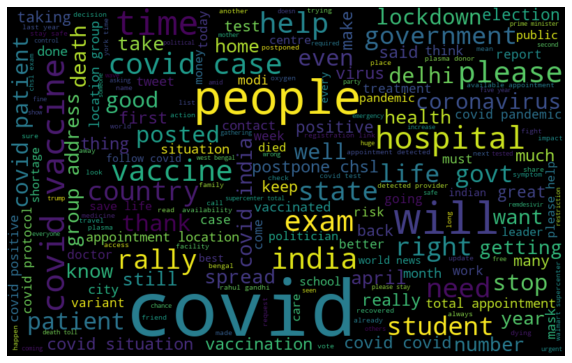

In [59]:
# Most commomly occuring words
def keywords():
    all_words = ' '.join([text for text in df_tweet['Clean_Tweet']])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

keywords()

# check out the sentiment of tweets using Textblob library
+ polarity of -1 means that tweet is  a negative statement 
+ 1 means tweet is a positive statement

In [60]:
# Sentiment analysis using Textblob
def sentiment(tweet):

    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    
df_tweet['Sentiment'] = df_tweet['Clean_Tweet'].apply(sentiment)

df_tweet.head(20)

,User_Id,Tweet_Id,Clean_Tweet,Sentiment
0,146327007,1383677614850678787,appreciated,1
1,2230054232,1383677615660142604,atleast some percentage have from student alre...,1
2,140768004,1383677618185138178,these about promoting yoga prepare covid battl...,0
3,1416448880,1383677620961779713,could treat anytime,0
4,1157682871319945217,1383677621217595392,covid drug contact remdesivir dist list remdes...,0
5,3559780094,1383677622492692482,this most responsible statement coming from po...,1
6,854234568559165440,1383677623310557188,please postpone chsl exam because covid pandem...,0
7,85400142,1383677624858210304,this appalling just past your bottom dollar th...,-1
8,3141328838,1383677625923555329,well done good initiative,1
9,952860070856896512,1383677626875748355,last year when center managing covid fight dir...,1


# Finally, determine the most commonly occurring hashtags

In [61]:
#query and retrieve the hashtags from our TwitterEntity table in the database.

# Querying hashtags from database
data_tags = DbConnect("SELECT Tweet_Id, Hashtag FROM TwitterEntity;")

df_tags = pd.DataFrame(columns=['Tweet_Id','Hashtags'])

for data in data_tags:
    index = len(df_tags)
    df_tags.loc[index,'Tweet_Id'] = data[0]
    df_tags.loc[index,'Hashtags'] = data[1]
    
df_tags.head(20)

,Tweet_Id,Hashtags
0,1383677615660142604,POSTPONE_SSC_CHSL
1,1383677622492692482,CovidTsunami
2,1383677622492692482,WestBengalElections2021
3,1383677633137831936,postponevtuexams
4,1383677644667908100,COVID19India
5,1383677647046156291,SoundHound
6,1383677649025789954,DuterteResign
7,1383677651034931203,Vietnam
8,1383677661432606724,REIDyMealsForFrontlibers
9,1383677665048096772,COVIDEmergency


### Create a pivot table to determine the count of unique hashtags from tweets

In [62]:
# Unique hashtag counts
table = df_tags.pivot_table(index="Hashtags",values='Tweet_Id',aggfunc=len)

# Convert pivot table to dataframe
df_pivot = pd.DataFrame(table.to_records())

df_pivot.head()

,Hashtags,Tweet_Id
0,ABC,1
1,AdegboyegaOyetola,1
2,Alberta411,5
3,AntiNationals,1
4,Applauds,1


# Visualise the hashtags

C:\Users\ctkay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ctkay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


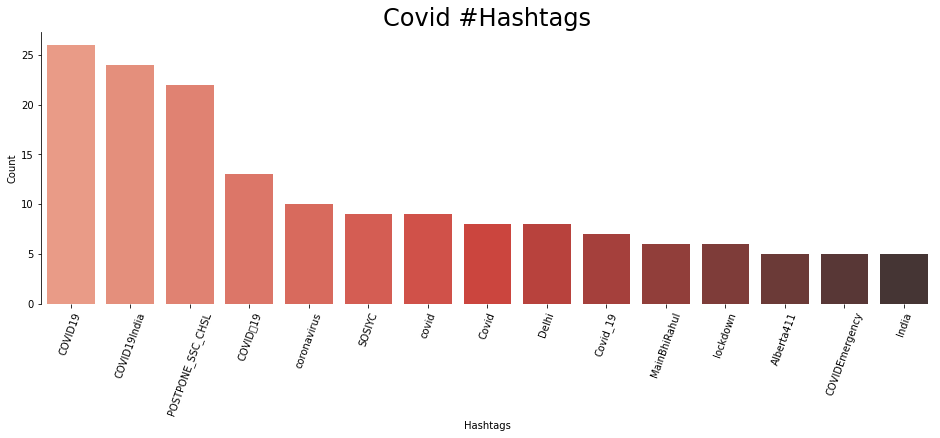

In [63]:
# Plotting hashtags counts

data = df_pivot.nlargest(columns="Tweet_Id", n = 15) 

# Creating bar graph
plt.figure(figsize=(16,5))
ax = sns.barplot(data=data, x= "Hashtags", y = "Tweet_Id", palette=("Reds_d"))

# Altering the visual elements
sns.set_context("poster")
ax.set(ylabel = 'Count')
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=70)

plt.title('Covid #Hashtags')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Output plot
plt.show()